# Returns
Return from time $t$ to time ${t+1}$ is given by:

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

In [1]:
import pandas as pd
import numpy as np

prices = pd.read_csv("data/close.csv").set_index("Date")
prices.index = pd.to_datetime(prices.index)
prices.head(10)

,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,
2015-01-02,6.828494,9.36,21.280001
2015-01-05,6.850834,8.56,20.959999
2015-01-06,6.902959,8.28,21.799999
2015-01-07,7.163589,8.67,22.600000
2015-01-08,7.238055,9.23,22.840000
2015-01-09,6.984872,9.51,22.350000
2015-01-12,6.865727,8.84,22.639999
2015-01-13,6.888066,9.09,22.510000
2015-01-14,6.925299,8.91,20.700001


<AxesSubplot:xlabel='Date'>

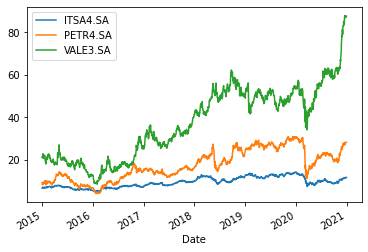

In [2]:
prices.plot()

In [3]:
# Daily Returns

returns = (prices/(prices.shift(1)) - 1).dropna()
returns.head(10)

,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,
2015-01-05,0.003272,-0.085470,-0.015038
2015-01-06,0.007609,-0.032710,0.040076
2015-01-07,0.037756,0.047101,0.036697
2015-01-08,0.010395,0.064590,0.010619
2015-01-09,-0.034979,0.030336,-0.021454
2015-01-12,-0.017058,-0.070452,0.012975
2015-01-13,0.003254,0.028281,-0.005742
2015-01-14,0.005405,-0.019802,-0.080409
2015-01-15,-0.002151,0.044893,0.011594


In [4]:
returns = prices.pct_change()
returns.head(10)

,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,0.003272,-0.085470,-0.015038
2015-01-06,0.007609,-0.032710,0.040076
2015-01-07,0.037756,0.047101,0.036697
2015-01-08,0.010395,0.064590,0.010619
2015-01-09,-0.034979,0.030336,-0.021454
2015-01-12,-0.017058,-0.070452,0.012975
2015-01-13,0.003254,0.028281,-0.005742
2015-01-14,0.005405,-0.019802,-0.080409


In [5]:
returns.std()

ITSA4.SA    0.020432
PETR4.SA    0.033722
VALE3.SA    0.031636
dtype: float64

In [6]:
returns.mean()

ITSA4.SA    0.000573
PETR4.SA    0.001322
VALE3.SA    0.001452
dtype: float64

In [7]:
start_date = pd.to_datetime("2015-01-05")
end_date = pd.to_datetime("2015-12-31")
period_mask = (returns.index >= start_date) & (returns.index <= end_date)
period_returns = returns[period_mask]
period_returns

,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,
2015-01-05,0.003272,-0.085470,-0.015038
2015-01-06,0.007609,-0.032710,0.040076
2015-01-07,0.037756,0.047101,0.036697
2015-01-08,0.010395,0.064590,0.010619
2015-01-09,-0.034979,0.030336,-0.021454
...,...,...,...
2015-12-22,0.004274,0.022590,0.021155
2015-12-23,-0.007092,0.020619,0.053386
2015-12-28,-0.002857,-0.033189,-0.043873


In [8]:
cumulative_returns = period_returns.add(1).cumprod().sub(1)
cumulative_returns

,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,
2015-01-05,0.003272,-0.085470,-0.015038
2015-01-06,0.010905,-0.115385,0.024436
2015-01-07,0.049073,-0.073718,0.062030
2015-01-08,0.059978,-0.013889,0.073308
2015-01-09,0.022901,0.016026,0.050282
...,...,...,...
2015-12-22,-0.152354,-0.274573,-0.410244
2015-12-23,-0.158366,-0.259615,-0.378759
2015-12-28,-0.160770,-0.284188,-0.406015


In [9]:
total_return = (period_returns + 1).prod() - 1
total_return

ITSA4.SA   -0.172794
PETR4.SA   -0.284188
VALE3.SA   -0.387688
dtype: float64

In [10]:
total_return = cumulative_returns.tail(1)
total_return

,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,
2015-12-30,-0.172794,-0.284188,-0.387688


<AxesSubplot:xlabel='Date'>

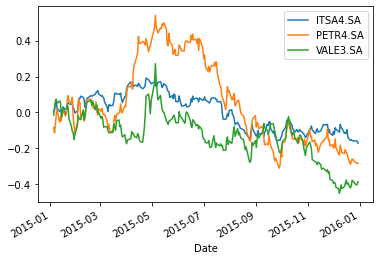

In [11]:
cumulative_returns.plot()

# Annualized Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

To annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

To annualize a cumulative daily return with $R_p$ as the cumulative return over the period and $p$ the number of days:

$$ (1+R_p)^{252/p} - 1$$

In [12]:
monthly_ret = 0.022
annualized_return = (1+monthly_ret)**12 - 1
annualized_return

0.29840670516253787

In [13]:
total_return = cumulative_returns.tail(1)
days = cumulative_returns.shape[0]
annualized_return = (1 + total_return)**(252/days) - 1
annualized_return


,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,
2015-12-30,-0.177265,-0.290993,-0.396209
